In [54]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [55]:
# Reference: https://github.com/jacobgil/pytorch-grad-cam
def show_cam_on_image(img: np.ndarray,
                      mask: np.ndarray,
                      use_rgb: bool = False,
                      colormap: int = cv2.COLORMAP_JET,
                      image_weight: float = 0.5) -> np.ndarray:
    #This function overlays the cam mask on the image as an heatmap.
    #By default the heatmap is in BGR format.
    #:param img: The base image in RGB or BGR format.
    #:param mask: The cam mask.
    #:param use_rgb: Whether to use an RGB or BGR heatmap, this should be set to True if 'img' is in RGB format.
    #:param colormap: The OpenCV colormap to be used.
    #:param image_weight: The final result is image_weight * img + (1-image_weight) * mask.
    #:returns: The default image with the cam overlay.

    heatmap = cv2.applyColorMap(np.uint8(255 * mask), colormap)
    if use_rgb:
        heatmap = cv2.cvtColor(heatmap, cv2.COLOR_BGR2RGB)
    heatmap = np.float32(heatmap) / 255

    if np.max(img) > 1:
        raise Exception(
            "The input image should np.float32 in the range [0, 1]")

    if image_weight < 0 or image_weight > 1:
        raise Exception(
            f"image_weight should be in the range [0, 1].\
                Got: {image_weight}")

    cam = (1-image_weight) * heatmap + image_weight * img
    cam = cam / np.max(cam)
    return np.uint8(255 * cam), np.uint8(255 * mask)

In [56]:
# Load source image and weight map
def LoadSourceImageAndWeight(index):
    img_name = str(index) + '_focus_0.jpg'
    img_weight_name = str(index) + '_image_weight.jpg'
    img_clinical_weight_name = str(index) + '_image_and_clinical_weight.jpg'
    img = cv2.imread(img_name); img = img.astype(np.float32); img /= 255.
    img_weight = cv2.imread(img_weight_name); img_weight = img_weight.astype(np.float32); img_weight /= 255.
    img_clinical_weight = cv2.imread(img_clinical_weight_name); img_clinical_weight = img_clinical_weight.astype(np.float32); img_clinical_weight /= 255.
    
    return img, img_weight, img_clinical_weight

In [57]:
img_1, img_weight_1, img_clinical_weight_1 = LoadSourceImageAndWeight(1)
img_2, img_weight_2, img_clinical_weight_2 = LoadSourceImageAndWeight(2)
img_3, img_weight_3, img_clinical_weight_3 = LoadSourceImageAndWeight(3)

In [58]:
img_heatmap_1, _ = show_cam_on_image(img_1, img_weight_1)
img_clinical_heatmap_1, _ = show_cam_on_image(img_1, img_clinical_weight_1)
cv2.imwrite('1_image_heatmap.jpg', img_heatmap_1); cv2.imwrite('1_image_clinical_heatmap.jpg', img_clinical_heatmap_1)  

img_heatmap_2, _ = show_cam_on_image(img_2, img_weight_2)
img_clinical_heatmap_2, _ = show_cam_on_image(img_2, img_clinical_weight_2)
cv2.imwrite('2_image_heatmap.jpg', img_heatmap_2); cv2.imwrite('2_image_clinical_heatmap.jpg', img_clinical_heatmap_2)

img_heatmap_3, _ = show_cam_on_image(img_3, img_weight_3)
img_clinical_heatmap_3, _ = show_cam_on_image(img_3, img_clinical_weight_3)
cv2.imwrite('3_image_heatmap.jpg', img_heatmap_3); cv2.imwrite('3_image_clinical_heatmap.jpg', img_clinical_heatmap_3)

True

In [59]:
imgs = [img_1, img_heatmap_1, img_clinical_heatmap_1, img_2, img_heatmap_2, img_clinical_heatmap_2, img_3, img_heatmap_3, img_clinical_heatmap_3 ]

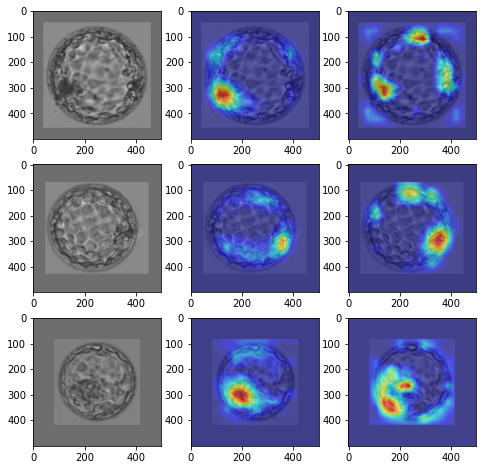

In [60]:
w = 10
h = 10
fig = plt.figure(figsize=(8, 8))
columns = 3
rows = 3
for i in range(1, columns*rows +1):
    img = imgs[i-1]
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
plt.show()